In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [41]:
data=pd.read_csv("Iris.csv")

In [42]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [44]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

Histogram for all features

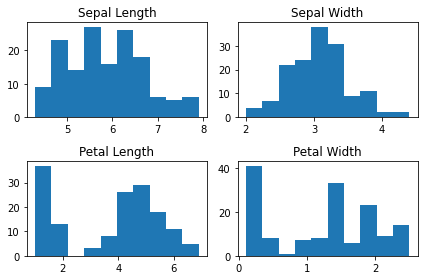

In [45]:
fig,ax1=plt.subplots(2,2)
ax1[0,0].hist(data['SepalLengthCm'],bins=10)
ax1[0,0].set_title("Sepal Length")
ax1[0,1].hist(data['SepalWidthCm'],bins=10)
ax1[0,1].set_title("Sepal Width")
ax1[1,0].hist(data['PetalLengthCm'],bins=10)
ax1[1,0].set_title("Petal Length")
ax1[1,1].hist(data['PetalWidthCm'],bins=10)
ax1[1,1].set_title("Petal Width")
plt.tight_layout() ##Automatically adjust subplot parameters to give specified padding.

In [104]:
X=data.iloc[:,1:5].values
_=data.iloc[:,5]

In [108]:
_.shape

(150,)

Correlation matrix

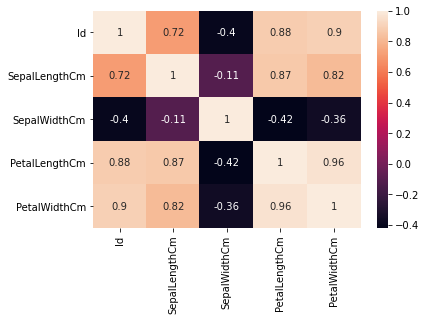

In [109]:
corr=data.corr()
sns.heatmap(corr,annot=True)
#plt.xticks(rotation=90)
plt.show()

In [110]:
# Finding the optimum number of clusters for k-means classification
variation=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=0,init="k-means++",max_iter=300,n_init=10)
    model.fit(X)
    #print(model.inertia_)
    variation.append(model.inertia_)

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. Inertia is not a normalized metric: we just know that lower values are better and zero is optimal

Each time we add new clusters , the total variance decreses within each cluster and when there
is only one point left in cluster then variance becomes 0.

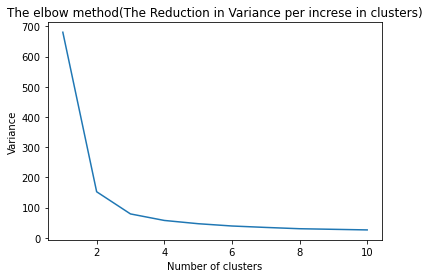

In [111]:
plt.plot(range(1,11),variation)
plt.title('The elbow method(The Reduction in Variance per increse in clusters)')
plt.xlabel("Number of clusters")
plt.ylabel("Variance")
plt.show()

As we can see that optimal number of clusters is 3 by elbow rule. So ,we choose number of clusters 3

In [112]:
model=KMeans(n_clusters=3,random_state=0,init='k-means++',n_init=10,max_iter=300)

In [113]:
model.fit(X)

KMeans(n_clusters=3, random_state=0)

In [139]:
cluster_center=model.cluster_centers_

In [115]:
y_=model.fit_predict(X)

In [116]:
y_  ## After clustering following labels are assigned to data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [131]:
data.iloc[:,5].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

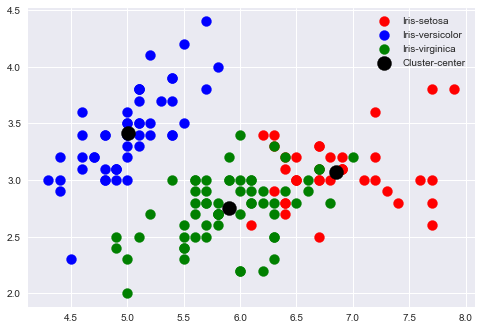

In [142]:
#Visualization the cluster - on the first two columns
plt.style.use("seaborn")
plt.scatter(X[y_== 0, 0], X[y_== 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_== 1, 0], X[y_== 1, 1] , s = 100 , c = "Blue" , label = "Iris-versicolor")
plt.scatter(X[y_ == 2, 0] ,X[y_ == 2, 1] , s= 100 , c = "green" , label = "Iris-virginica")

## ploting the centriod of the clusters

plt.scatter(cluster_center[:,0],cluster_center[:,1] , s=200 , c="Black" , 
            label="Cluster-center")

plt.legend()